In [18]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import os
import matplotlib.ticker as ticker

In [30]:
# genes = ["ha", "na", "ns", "pa", "pb1", "pb2", "np", "mp"]
genes = ["ha", "na"]
clades = ["canineH3N2"]

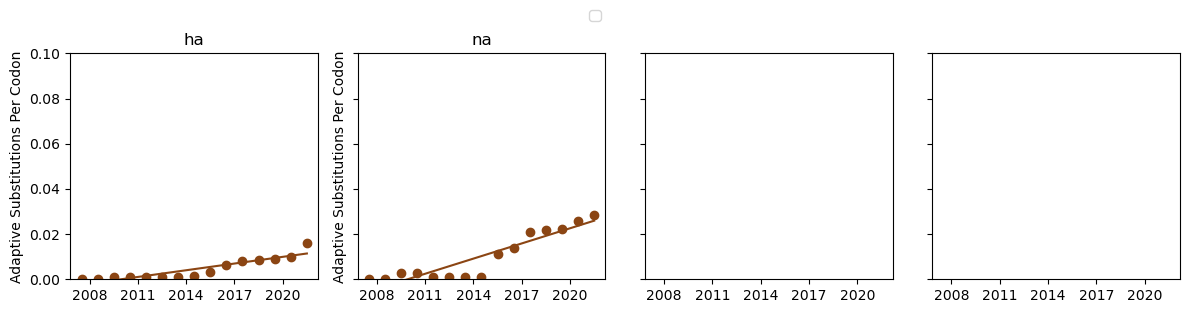

In [31]:
clade_colors = {
    "canineH3N2": "saddlebrown" }

num_genes = len(genes)
num_columns = 4
num_rows = (num_genes + num_columns - 1) // num_columns 

fig, axs = plt.subplots(num_rows, num_columns, sharex=True, sharey=True, figsize=(12, 3 * num_rows), label='')
fig.legend(clades, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(clades))
axs = axs.flatten()

for clade_index, clade in enumerate(clades):
    clade_color = clade_colors.get(clade, 'black')  # Default to black if clade not in the dictionary

    for i, gene in enumerate(genes):
        path = f"./{clade}/{clade}/h3nx_{gene}_3_3_adaptation_bootstrapped.json"
        if os.path.exists(path):
            with open(path, "r") as file:
                jsonData = json.load(file)

            x = jsonData['window_midpoint']
            y = jsonData['adaptive_substitutions_per_codon']

            axs[i].scatter(x, y, label=clade, color=clade_color)
            
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            axs[i].plot(x, slope * np.array(x) + intercept, color=clade_color)

            axs[i].set_title(f"{gene}")
            axs[i].set_ylabel("Adaptive Substitutions Per Codon")
            axs[i].set_ylim(0, 0.10)
            axs[i].xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))

    # Set x-axis label only for the second row
    # for i in [4, 5, 6, 7]:
    #     axs[i].set_xlabel("Time Window")

plt.tight_layout()
plt.show()


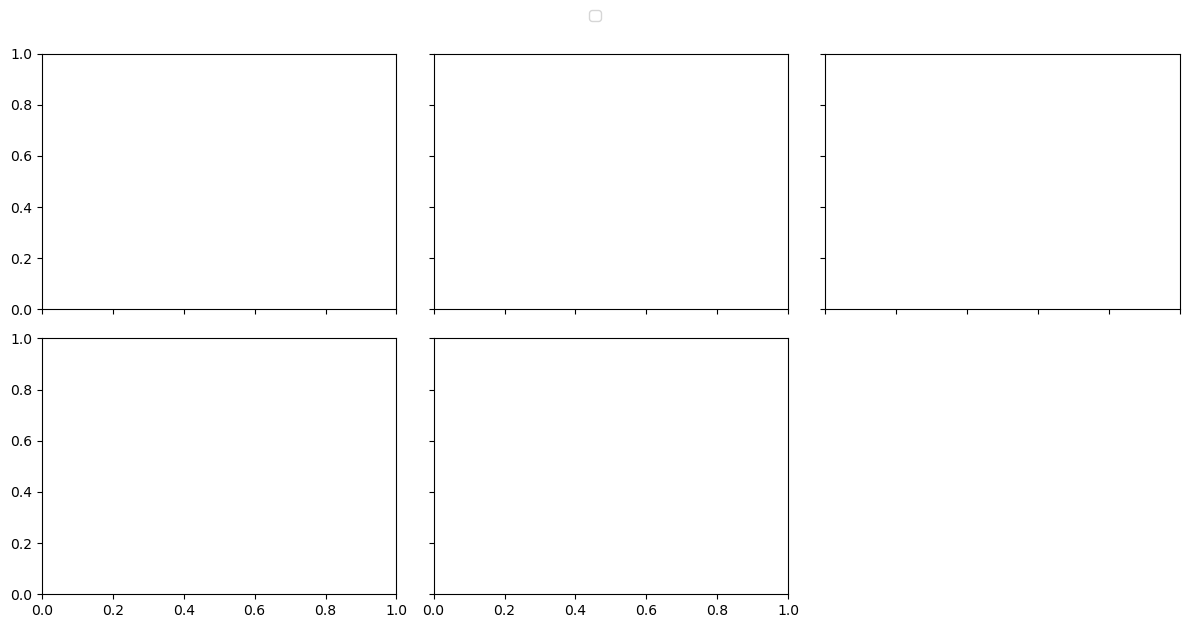

In [6]:
#for IIZD poster
genes = ["HA",  "PA", "PB1" , "PB2", "NA"]
clades = ["Canine H3N2", "Canine H3N8",  "Equine", "Human", 
            "European Swine", "Eurasian Avian", "NA Avian", "NA1948 Avian", 
            "NA1964 Avian","NA1995 Swine" "NA2000 Swine", "NA2012 Swine", "NA2005 Swine"]

clade_colors = {
    "Canine H3N2": "saddlebrown",
    "Canine H3N8": "chocolate",
    "Equine": "pink",
    "Human": "darkturquoise",
    "European Swine": "blue",
    "Eurasian Avian": "red",
    "NA Avian": "lightcoral",
    "NA1948 Avian": "lightcoral",
    "NA1964 Avian": "firebrick",
    "NA1995 Swine": "blueviolet",
    "NA2000 Swine": "blueviolet",
    "NA2012 Swine": "indigo",
    "NA2005 Swine": "blueviolet",
}

num_genes = len(genes)
num_columns = 3
num_rows = (num_genes + num_columns - 1) // num_columns 

fig, axs = plt.subplots(num_rows, num_columns, sharex=True, sharey=True, figsize=(12, 3 * num_rows), label='')
fig.legend(clades, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(clades))
axs = axs.flatten()

for clade_index, clade in enumerate(clades):
    clade_color = clade_colors.get(clade, 'black')  # Default to black if clade not in the dictionary

    for i, gene in enumerate(genes):
        # Calculate the subplot index based on the number of columns
        subplot_index = i % num_columns + (i // num_columns) * num_columns

        # Break the loop if we exceed the number of genes
        if i >= num_genes:
            break

        path = f"./{clade}/h3nx_{gene}_3_3_adaptation_bootstrapped.json"
        if os.path.exists(path):
            with open(path, "r") as file:
                jsonData = json.load(file)

            x = jsonData['window_midpoint']
            y = jsonData['adaptive_substitutions_per_codon']

            axs[subplot_index].scatter(x, y, label=clade, color=clade_color)
            
            slope, intercept, r_value, p_value, std_err = linregress(x, y)
            axs[subplot_index].plot(x, slope * np.array(x) + intercept, color=clade_color)

            axs[subplot_index].set_title(f"{gene}")
            axs[subplot_index].set_ylim(0, 0.25)

            
#remove extra subplots if present
for i in range(num_genes, len(axs)):
    fig.delaxes(axs[i])


plt.tight_layout()
plt.show()